# Computational Methods for Astrophysics, Homework #2, Askold Vilkha

In [163]:
# importing libraries
import numpy as np
import matplotlib.pyplot as plt
from scipy import optimize # for root finding reference values
from scipy.misc import derivative # numeric derivative
from sympy import *
#from sympy.utilities import lambdify

## Exercise 1, Root Finding Algorithm (Based on Bisection and Newton's methods)

In this problem, we are going to find roots for a function:
$$f(x) = \frac{(x + 5) ^ 3 + x + 5}{(x + 5) ^ 4 + 1} + \left(x + \frac{11}{2}\right) e^ {\cos(x + 5)}$$
We will numerically find the value of $x_0$, where the function $f(x_0) = 0$. Plot of this function is shown in Fig. 1. As a reference tool, we use function `optimize.root_scalar` from `scipy` package. It allows user to use a set of different methods, including Bisection and Newton's, and many more. 

In [33]:
def test_func(x: float) -> float:
    '''
    Function that will be used to test the algorithm
    '''
    res = (np.power(x + 5, 3) + x + 5) / (np.power(x + 5, 4) + 1) + (x + 11/2) * np.exp(np.cos(x + 5))
    return res

In [32]:
# reference value of the root
ref_root = optimize.root_scalar(test_func, bracket = [-20, 20])
ref_root

      converged: True
           flag: 'converged'
 function_calls: 15
     iterations: 14
           root: -5.349166623285174

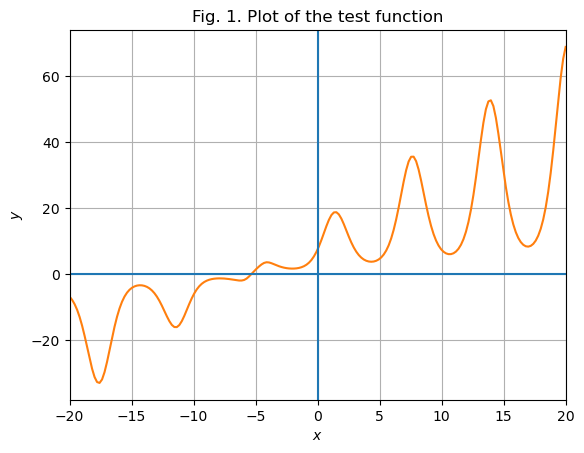

In [24]:
x_test = np.linspace(-20, 20, 200)
plt.plot(x_test, test_func(x_test), color = 'C1')
plt.axhline(y = 0, color = 'C0')
plt.axvline(x = 0, color = 'C0')
plt.xlabel(r'$x$'); plt.ylabel(r'$y$')
plt.xlim(-20, 20); plt.grid(True)
plt.title(r'Fig. 1. Plot of the test function');

In our algorithm, we use Bisection method as a tool to find a starting interval or point for another root finding algorithm. Bisection method is not the most efficient tool to find a precise root, but can be used to define approximate interval. The general idea is that we start with finding values of the function at the starting point $a$ and ending point $b$ (the user provides a bracket $[a, b]$). If they are of a different sign, we find a central point between them: $c = \frac{a + b}{2}$. The next step is to calculate $f(c)$. This will be a new value of $a$ or $b$ that we pass to the next iteration. The bracket $[a, b]$ has to be defined in such a way that $f(a)$ and $f(b)$ have different signs. Therefore, if $f(c)$ is of the same sign as the starting $f(a)$, then new bracket will be $[c, b]$, if signs are different, then it will be $[a, c]$. Then, we pass the new bracket to the next iteration, and repeat the process. Stopping condition is when the interval $[a, b]$ or $|f(c)|$ is smaller than some critical value defined by user. Note, that this method is almost brute force, so it is slower than other ones. For example, using function `optimize.root_scalar` and Bisection method, we need 45 iterations, three times more than initial 15 iterations in the example above. Also, if you choose the bracket that does not contain the actual root, it will fail. It is a good idea to plot the function first, and decide on the bracket after seeing the plot. In Fig. 2, we show a few steps of Bisection method. (source: https://en.wikipedia.org/wiki/Bisection_method#/media/File:Bisection_method.svg) $\\$
This algorithm is implemented in function `rootfinder_bisect`

In [81]:
# example of the bisection method root finder
ref_root_bisect = optimize.root_scalar(test_func, method = 'bisect', bracket = [-20, 20])
ref_root_bisect

      converged: True
           flag: 'converged'
 function_calls: 47
     iterations: 45
           root: -5.349166623285555

![Alternative-text](bisect_rescaled.png)
$$
\text{Fig. 2 Bisection root finding method}
$$

In [233]:
def rootfinder_bisect(func, bracket: list, x_stop: float = 1e-5, y_stop: float = 1e-5, it_limit: int = 10000, return_bracket: bool = False):
    '''
    Function that contains the Bisection root finding method. Can return either a bracket that contains a root, or approximate root value, and the number of iterations \n
    Input: func (function) -  function that the user wants to find the roots of \\
    bracket (list) - list of 2 elements  [a, b], which is an interval where user wants to find the roots \\
    x_stop (float) (optional) - if the interval length at some iteration is smaller than x_stop, the algorithm will stop and return the answer, must be positive! \\
    y_stop (float) (optional) - if |func(x)| < y_stop at some iteration, the algorithm will stop and return the answer, must be positive! \\
    Note. If you change y_stop but still get the same number of iterations, consider making x_stop smaller so the function stops at reaching y_stop. 
    Vice versa if you change x_stop. \\
    it_limit (int) (optional) - maximum number of iterations of the algorithm, must be positive \\
    return_bracket (bool) (optional) - if True, the function will return the bracket that contains the root, if False, approximate root value \n
    Output: res (list) - bracket that contains the root, or\\
    x_c (float) - approximate root value, depending on the return_bracket parameter \\
    it (int) - number of iterations
    '''
    if len(bracket) > 2:
        raise ValueError(bracket, r'Bracket must not contain more than 2 elements!')
    if x_stop <= 0:
        raise ValueError(x_stop, r'x_stop must be positive!')
    elif y_stop <= 0:
        raise ValueError(y_stop, r'y_stop must be positive!')
    if it_limit <= 0:
        raise ValueError(it_limit, r'it_limit must be positive!')
    if sign(func(bracket[0])) == sign(func(bracket[1])):
        print(r'The bracket does not contain the root, please choose a different one!')
        return None
    
    bracket.sort()
    max_it = it_limit; it = 0
    
    # main algorithm
    x_c = (bracket[1] + bracket[0]) / 2
    while np.abs(bracket[1] - bracket[0]) >= x_stop and np.abs(func(x_c)) >= y_stop and it < max_it:
        x_a = bracket[0]; x_b = bracket[1]
        x_c = (bracket[1] + bracket[0]) / 2

        if sign(func(x_c)) == sign(func(x_a)): 
            x_a = x_c # if signs for f(a) and f(c) are the same, we should move to [c, b] interval
        else:
            x_b = x_c # if signs for f(a) and f(c) are different, then our new interval is [a, c]
        
        bracket = [x_a, x_b]
        it = it + 1

    res_bracket = bracket
    if return_bracket:
        return res_bracket, it
    else:
        return x_c, it

Now, we can test this function to see if the root will be close to the reference root value. 

In [231]:
root_bisect = rootfinder_bisect(test_func, [-20, 20])
print(r'Error of the algorithm with default settings is %g, number of iterations: %i'%(root_bisect[0] - ref_root.root, root_bisect[1]))

Error of the algorithm with default settings is -2.15418e-06, number of iterations: 22


The next algorithm we are going to implement here is Newton's method. Its general idea is derived from the definition of the derivative. For instance, let $f(x_1) = 0$. Then:
$$f'(x_0) = \frac{f(x_0) - f(x_1)}{x_0 - x_1} = \frac{f(x_0) - 0}{x_0 - x_1} \implies x_0 - x_1 = \frac{f(x_0)}{f'(x_0)} \\
x_1 = x_0 - \frac{f(x_0)}{f'(x_0)}$$
The recursive formula then is:
$$x_{n+1} = x_n - \frac{f(x_n)}{f'(x_n)}$$ 
This means that at some point we will reach a point where $x_{n+1}$ is the closest value to the root, after some number of iterations. Note, that this method is more accurate than bisection, but it will fail if the derivative equals to zero at the starting point or is not existent. 
Reference: https://en.wikipedia.org/wiki/Newton%27s_method# $\\$
This is implemented in function `rootfinder_newton`

In [232]:
def rootfinder_newton(func, x_0: float, x_stop: float = 1e-16, y_stop: float = 1e-16, it_limit: int = 1000, ignore_fail: bool = False):
    '''
    Function that implements Newton root finding algorithm. Takes as input test function, and starting point. Calculates the derivative of the test function. 
    Returns the root and number of iterations. \n
    Input: func (function) - function that the user wants to find the roots of \\
    x_0 (float) - approximate root, a starting point for Newton's method. Could be obtained using other method, for example bisection \\
    x_stop (float) (optional) - if |x_1 - x_0| < x_stop, the function will stop and return the answer (x_1), must be positive! \\
    y_stop (float) (optional) - if |func(x)| < y_stop at some iteration, the algorithm will stop and return the answer, must be positive! \\
    Note. If you change y_stop but still get the same number of iterations, consider making x_stop smaller so the function stops at reaching y_stop. 
    Vice versa if you change x_stop. \\
    it_limit (int) (optional) - maximum number of iterations of the algorithm, must be positive! \\
    ignore_fail (bool) (optional) - if True, the function will not break after reaching the fail condition but keep running and return the wrong root value \n
    Output: x_1 (float) - approximate root value \\
    it (int) - number of iterations 
    '''
    if x_stop <= 0:
        raise ValueError(x_stop, r'x_stop must be positive!')
    elif y_stop <= 0:
        raise ValueError(y_stop, r'y_stop must be positive!')
    if it_limit <= 0:
        raise ValueError(it_limit, r'it_limit must be positive!')
    
    # derivative calculation
    f_prime_x0 = derivative(func, x_0, dx = 1e-6)
    x_1 = x_0 - func(x_0) / f_prime_x0

    # additional stopping condition: we will check value of f(x_1) at each 5th iteration. If it goes further from zero for 3 consecutive iterations, algorithm fails to converge
    f_ref = np.abs(func(x_1)); x_start = x_0
    fail_count = 0

    # main algorithm
    max_it = it_limit; it = 0
    while np.abs(x_1 - x_0) >= x_stop and np.abs(func(x_1)) >= y_stop and it < max_it:
        x_0 = x_1
        f_prime_x0 = derivative(func, x_0, dx = 1e-6)
        x_1 = x_0 - func(x_0) / f_prime_x0
        it = it + 1
        if it % 5 == 0 and not ignore_fail: 
            if np.abs(func(x_1)) > f_ref:
                fail_count = fail_count + 1
                f_ref = func(x_1)
            else:
                fail_count = 0
        if fail_count > 3:
            print(r'The starting point %g does not fit well for the algorithm, choose a better one. Stopped at %i iterations.'%(x_start, it))
            return None

    return x_1, it

We will test this function with a starting point $x_0 = -5$. We will conduct more strict tests of this function in the Exercise #2

In [224]:
root_newton = rootfinder_newton(test_func, -5)
print(r'Error of the algorithm with starting point %g is %g, number of iterations: %i'%(-5, root_newton[0] - ref_root.root, root_newton[1]))

Error of the algorithm with starting point -5 is 0, number of iterations: 4


The error here is indead 0. The reason is that all the digits calculated with our algorithm are the same as for `scipy` function `optimize.root_scalar`. If we compare with roots obtained with bisection method, the error would not be exactly zero, but still incredibly small. Also, it is worth pointing out that it is obtained with just 4 iterations. To calculate precise root with bisection method, `optimize.root_scalar` function used 45 iterations, our bisection function `rootfinder_bisect` would use more than 10000 iterations. It points out to incredible performance of Newton's method with a good starting point.

In [221]:
print(r'Error of the algorithm with starting point %g is %g, number of iterations: %i'%(-5, root_newton[0] - ref_root_bisect.root, root_newton[1]))

Error of the algorithm with starting point -5 is 3.81029e-13, number of iterations: 4


Since Newton's method is very precise and fast, but needs a good starting point, we develop a hybrid method. It takes as an input a test function and starting brackets. At first, it uses bisection method to find out the approximate root. Since Newton's method just needs a starting point close enough for it to converge, we do not try to get a very precise guess. We are comfortable with putting $1$ as a stopping condition both for `x_stop` and `y_stop` in `rootfinder_bisect` function. After we calculate approximate root, we pass it to `rootfinder_newton` and our hybrid method returns the final result and the number of iterations. $\\$
This is implemented in `rootfinder_hybrid` function.

In [240]:
def rootfinder_hybrid(func, bracket: list, x_stop: float = 1e-16, y_stop: float = 1e-16, it_limit: int = 1000):
    '''
    Function that calculates the root of the test function using our hybrid algorithm (combining bisection method to find an approximate root and newton's to calculate 
    precise root) and returns the root and the number of iterations. \n
    Input: func (function) -  function that the user wants to find the roots of \\
    bracket (list) - list of 2 elements  [a, b], which is an interval where user wants to find the roots \\
    All the optional arguments are passed to rootfinder_newton! \\
    x_stop (float) (optional) - if |x_1 - x_0| < x_stop, the function will stop and return the answer (x_1), must be positive! \\
    y_stop (float) (optional) - if |func(x)| < y_stop at some iteration, the algorithm will stop and return the answer, must be positive! \\
    Note. If you change y_stop but still get the same number of iterations, consider making x_stop smaller so the function stops at reaching y_stop. 
    Vice versa if you change x_stop. \\
    it_limit (int) (optional) - maximum number of iterations of the algorithm, must be positive! \n
    Output: root_precise (float) - precise root value \\
    it (list) - number of iterations of bisection and newton's methods respectively
    '''
    
    # bisection algorithm finds the approximate root
    root_approx_data = rootfinder_bisect(func, bracket, x_stop = 1, y_stop = 1)
    it_bisect = root_approx_data[1]
    root_approx = root_approx_data[0]

    # newton's algorithm finds the precise root
    root_precise_data = rootfinder_newton(func, root_approx, x_stop, y_stop, it_limit)
    it_newton = root_precise_data[1]
    root_precise = root_precise_data[0]

    it_list = [it_bisect, it_newton]
    return root_precise, it_list
    

We will now test this function. 

In [242]:
root_hybrid = rootfinder_hybrid(test_func, [-20, 20])
print(r'Error of the hybrid algorithm is %g, number of iterations: %i (bisection %i; newton %i)'%
      (root_hybrid[0] - ref_root.root, int(sum(root_hybrid[1])), root_hybrid[1][0], root_hybrid[1][1]))

Error of the hybrid algorithm is 0, number of iterations: 10 (bisection 6; newton 4)


This test can be scaled to see how many iterations it takes for this function to calculate roots, if brackets are defined as $[-a, a]$, and $a$ changes from $6$ to $20$. Results are shown in Fig. 3. Numbers of iterations of Bisection and Newton's methods respectively are also shown. 

In [282]:
a_test = np.linspace(6, 20, 50)
root_test_data = {}
root_test_data['root'] = np.zeros_like(a_test)
root_test_data['it_total'] = np.zeros_like(a_test)
root_test_data['it_bisect'] = np.zeros_like(a_test)
root_test_data['it_newton'] = np.zeros_like(a_test)
for i in range(len(a_test)):
    root_hybrid_data = rootfinder_hybrid(test_func, [-1 * a_test[i], a_test[i]])
    root_test_data['root'][i] = root_hybrid_data[0]
    root_test_data['it_total'][i] = sum(root_hybrid_data[1])
    root_test_data['it_bisect'][i] = root_hybrid_data[1][0]
    root_test_data['it_newton'][i] = root_hybrid_data[1][1]


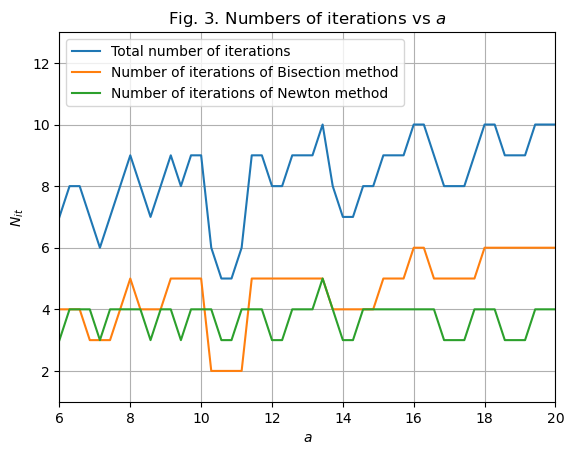

In [294]:
plt.plot(a_test, root_test_data['it_total'], label = r'Total number of iterations')
plt.plot(a_test, root_test_data['it_bisect'], label = r'Number of iterations of Bisection method')
plt.plot(a_test, root_test_data['it_newton'], label = r'Number of iterations of Newton method')
plt.xlim(6, 20);  plt.ylim(1, 13); plt.grid(True)
plt.legend(loc = 'upper left')
plt.xlabel(r'$a$'); plt.ylabel(r'$N_{it}$')
plt.title(r'Fig. 3. Numbers of iterations vs $a$');

The plot shows that maximum total number of iterations is $10$, which is a great result. Also, there is usually more iterations of Bisection method than Newton's involved. Also, it is clear that the number of iterations increases with increasing width of the bracket $a$. However, it is not a stable increase, some points need less iterations to evaluate using both methods. This is probably related to the points, where the original function stops to increase and starts to decrease (ref. Fig. 1) (local maximums and minimums). Also, Newton's method always needs $3$-$5$ iterations, while bisection needs more with increasing $a$. Newton's method usually starts from similar starting point, while Bisection method needs to locate that point from increasing bracket.